In [5]:
# 환경 설정 
!python --version
!pip list |findstr opencv

Python 3.9.7
opencv-python       4.5.5.62


In [6]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [10]:
!pip install opencv-python
!pip install opencv-contrib-python==4.5.2.52 --user
!pip install opencv-python-headless==4.5.2.52 --user

In [3]:
!pip install numpy
!pip install cmake
!pip install dlib

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


  Using cached cmake-3.22.1-py2.py3-none-win_amd64.whl (38.1 MB)
  Using cached dlib-19.22.1-cp39-cp39-win_amd64.whl


In [8]:
!pip install matplotlib

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# Step1. 고양이 수염 이미지 다운로드하기 

In [15]:
!pip install wget


오른쪽 url에서 고양이 수염 이미지 다운로드 : "https://cdn-icons-png.flaticon.com/512/24/24674.png"
내 얼굴 사진은 my_face.jpg, my_face2.jpg로 저장함.

# Step 2. 얼굴 검출 & 랜드마크 검출 하기


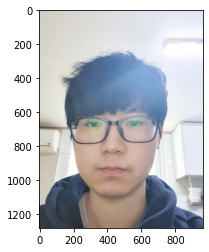

In [40]:
# 내 얼굴 사진 확인하기 
my_image_path = './my_face2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

#rgb로 전황
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [41]:
#얼굴 검출하기 
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(171, 542) (726, 1096)]]


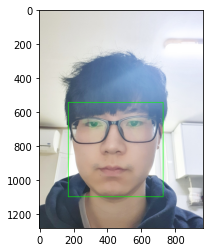

In [42]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 검출하기 

"http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2" 에서 랜트마클 모델 다운로드 

In [43]:


model_path = "./shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [44]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


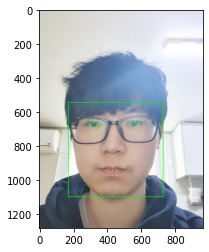

In [45]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3 스티커 적용 위치 확인하기

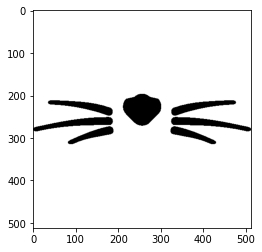

In [107]:

# 스티커의 모양은 고양이 수염인데 아래와 같다. 
my_image_path2 = './cat-whiskers.png'
img_bgr2 = cv2.imread(my_image_path2)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr2.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_show)
plt.show()

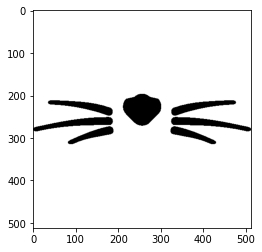

In [108]:

#rgb로 전황
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

이를 화면에 적용시키기 위해선 고양이 코의 위치를 사진 속 하단 코(콧구멍쪽)에 위치 시켜야한다.

스티커의 크기는 얼굴 너비와 일치시키면 될 것으로 보인다. 


In [92]:
# 좌표 확인 

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코 하단의 index는 33 입니다
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(428, 854)
(x,y) : (428,1131)
(w,h) : (556,556)


In [149]:
sticker_path = './cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(556, 556, 3)


In [150]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (150,575)
(x,y) : (150,575)


# Step 4 스티커 적용하기

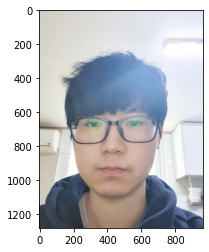

In [151]:
my_image_path = './my_face2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

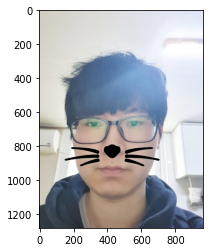

In [152]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()